In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [14]:
df = pd.read_csv("./WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [15]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
# Getting the number of rows and columns
print("Number of rows: {0}, number of columns: {1}".format(df.shape[0], df.shape[1]))

Number of rows: 7043, number of columns: 21


In [17]:
# Getting the number of missing values in each columns
np.sum(df.isnull())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No NaN values. It looks like this is a clean data set, but something doesn't look right. Let's take a look at the data types.

In [18]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Strangely, the "TotalCharges" column is not a float data type. A quick visual inspection shows that some cells in "TotalCharges" contain a space character (" "). Let's see what these rows are.

In [19]:
df.loc[df["TotalCharges"] == " "] 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


It turns out that all of the "tenure" column are zero for rows where the "TotalCharges" column is a space character. This makes sense, as the total charge should be:

    TotalCharges ($) = MonthlyCharges ($/Month) * tenure (Month)
    
I don't want to eliminate these entries, as they are a special subgroup of the churned customers. If they terminated the service in less than a month, they most likely paid a prorated fee, which should be a small amount compared to the rest of "TotalCharges". Therefore, I will inpute these missing values with zero.

I don't want to eliminate these entries, as they are a special subgroup of the churned customers. If they terminated the service in less than a month, they most likely paid a prorated fee, which should be a small amount compared to the rest of "TotalCharges". Therefore, I will inpute these missing values with zero.

I don't want to eliminate these entries, as they are a special subgroup of the churned customers. If they terminated the service in less than a month, they most likely paid a prorated fee, which should be a small amount compared to the rest of "TotalCharges". Therefore, I will inpute these missing values with zero.

In [20]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [21]:
df["TotalCharges"].loc[df["TotalCharges"] == " "] = 0.0 # Assign 0.0 where "TotalCharges" is a space character (" ")

/home/work/anaconda3/envs/py36/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [22]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [23]:
TotalCharges = pd.to_numeric(df["TotalCharges"]) # Convert the "TotalCharges" to float64...

In [24]:
df["TotalCharges"] = TotalCharges # ... and substitute.

In [25]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Now the "TotalCharges" is in float64.

In [26]:
# Getting the counts for the number of churned customers vs the current customers
df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

This is an inbalanced data, as indicated by the above value counts. The current customers outnumber the churned customers by a significant margin.

In [27]:
# Separating the churned and the current customers into a separate dataframes.
df_churned = df.loc[df["Churn"] == "Yes"].copy()
df_stayed = df.loc[df["Churn"] == "No"].copy()

In [28]:
column_names_to_compare = list(df.columns)
col_to_remove = ["customerID", "tenure", "MonthlyCharges", "TotalCharges", "Churn"]
for name in col_to_remove:
    column_names_to_compare.remove(name)

In [29]:
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'figure.figsize': [12, 8]})

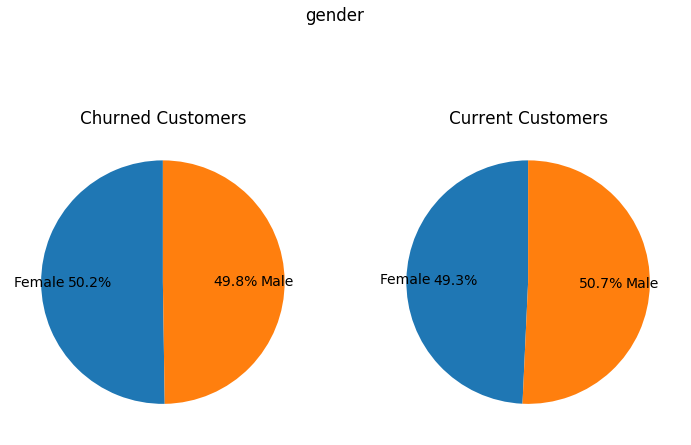

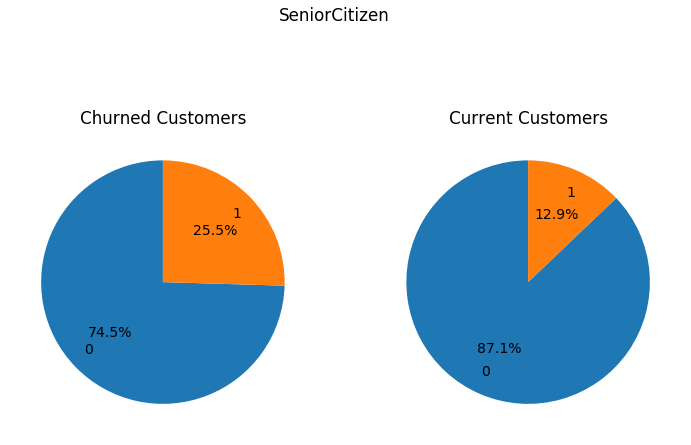

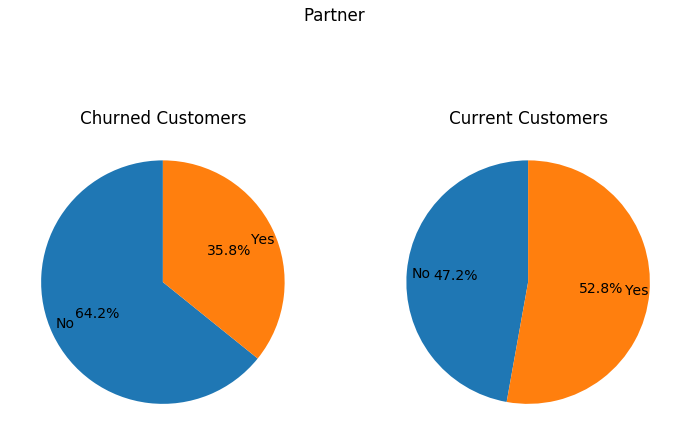

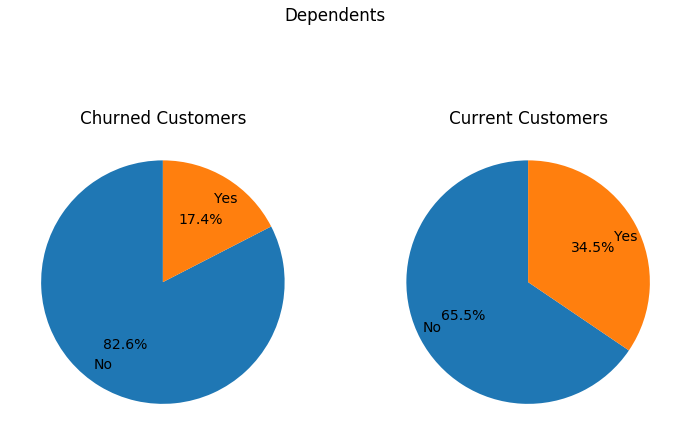

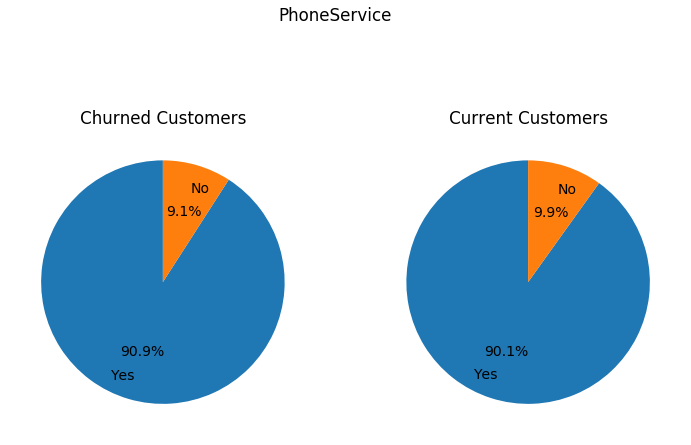

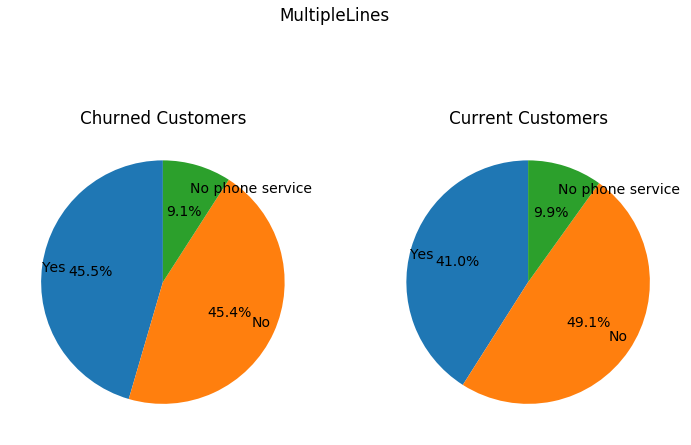

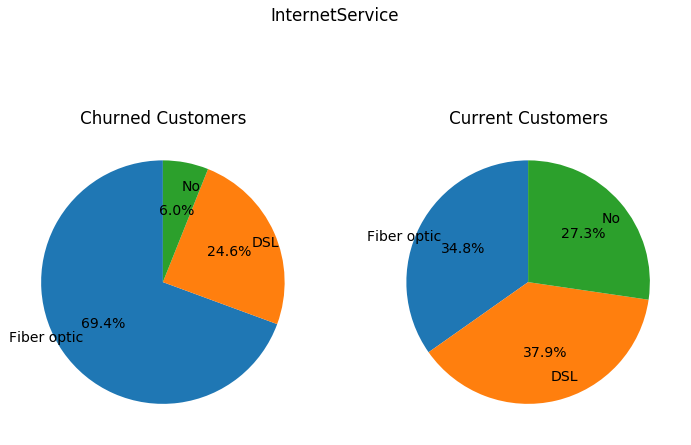

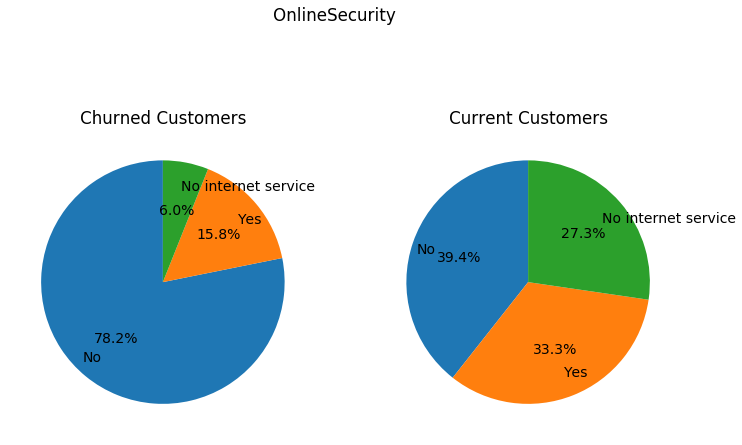

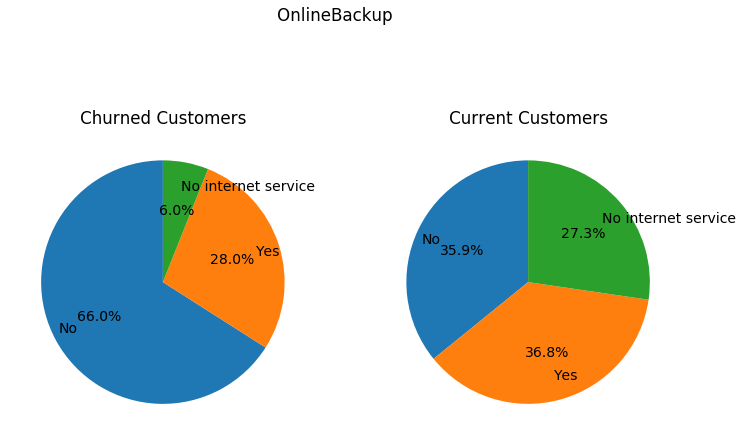

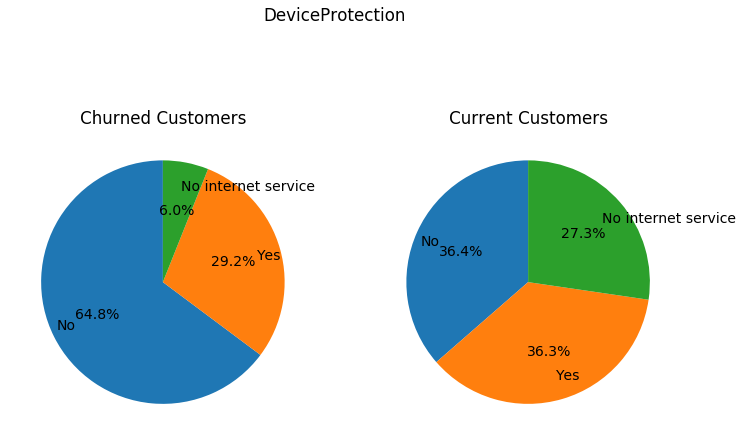

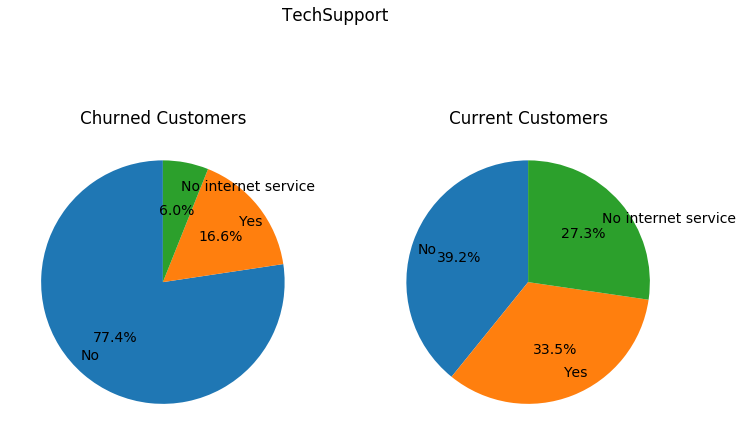

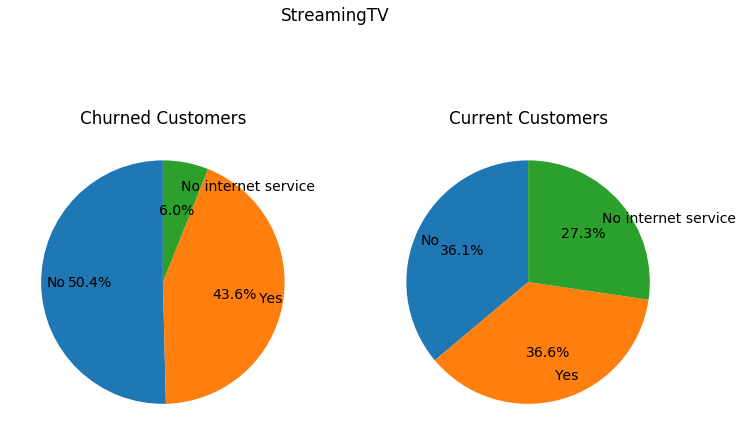

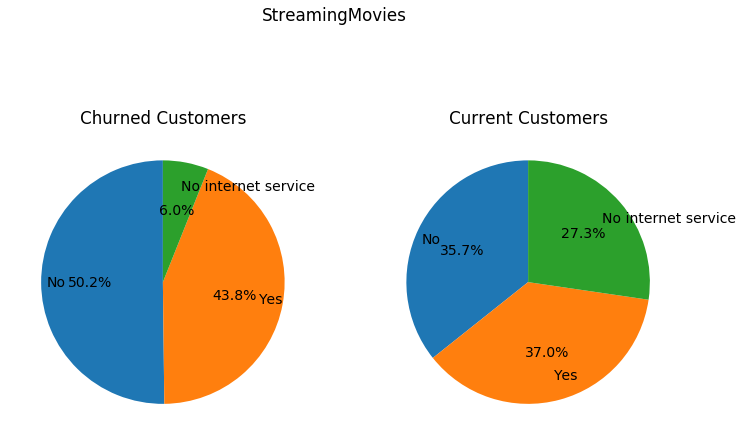

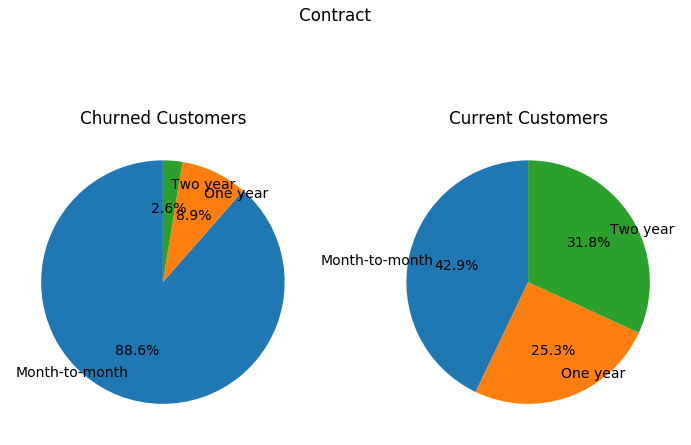

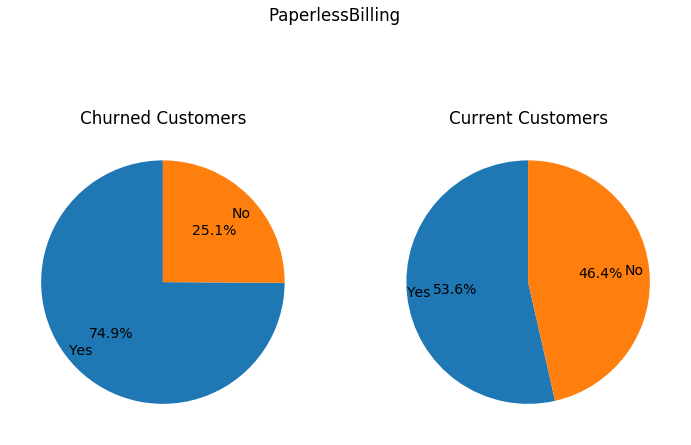

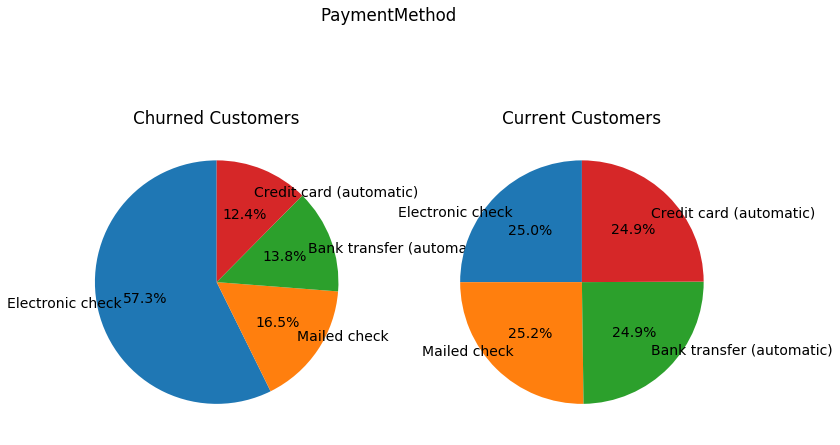

In [50]:
for col_name in column_names_to_compare:
    churned_count = df_churned[col_name].value_counts()
    stayed_count = df_stayed[col_name].value_counts()
    
    churned_values = []
    for i in range(len(churned_count.index)):
        churned_values.append(churned_count[i])
    churned_labels = list(churned_count.index)
    
    stayed_values = []
    for i in range(len(stayed_count.index)):
        stayed_values.append(stayed_count[i])
    stayed_labels = list(stayed_count.index)
    
    churned_values_ordered = []
    stayed_values_ordered = []
    ordered_labels = []

    for name in churned_labels:
        churned_idx = churned_labels.index(name)
        stayed_idx = stayed_labels.index(name)
        churned_values_ordered.append(churned_values[churned_idx])
        stayed_values_ordered.append(stayed_values[stayed_idx])
        ordered_labels.append(name)
    
    fig = plt.figure()

    ax1 = fig.add_subplot(121) 
    ax1.pie(churned_values_ordered, labels=ordered_labels, autopct='%1.1f%%',
         startangle=90, labeldistance=0.8)
    ax1.set_title("Churned Customers")

    ax2 = fig.add_subplot(122) 
    ax2.pie(stayed_values_ordered, labels=ordered_labels, autopct='%1.1f%%',
        shadow=False, startangle=90, labeldistance=0.8)
    ax2.set_title("Current Customers")
    
    plt.suptitle(col_name)
    plt.show()
    
    print('\n')


In [53]:
# Separating the churned and the current customers into a separate dataframes.
churned_tenure = df_churned["tenure"] 

In [56]:
plt.rcParams.update({'figure.figsize': [12, 6]})

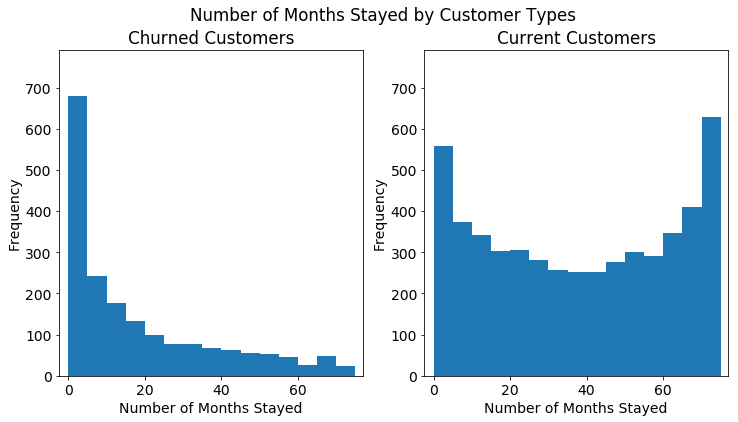

In [60]:
bin_size = 5 # A size of a bin 
bins = np.arange(0, churned_tenure.max()+bin_size, bin_size) # Array of bins

# Get the maxima values to be used for graphs
largest = df_stayed["tenure"].max() # Max value of the tenure column
bin_numbers = (math.ceil(largest/(bin_size * 10)) * 10) # Calculate the number of bins to be graphed. A bit hacky.
count_churned, division_churned = np.histogram(df_churned["tenure"], bin_numbers) # Get the histogram raw data for the churned customers
count_stayed, division_stayed = np.histogram(df_stayed["tenure"], bin_numbers) # Get the histogram raw data for the current customers

max_count_churned = count_churned.max()
max_count_stayed = count_stayed.max()
max_division_churned = division_churned.max()
max_division_stayed = division_stayed.max()

max_count_val = max_count_churned if max_count_churned >= max_count_stayed else max_count_stayed
max_division_val = max_division_churned if max_division_churned >= max_division_stayed else max_division_stayed

max_count_val = round(max_count_val, -1) *  1.1 # Multiply by 1.1 to give the graph a slightly more head room
max_division_val = round(max_division_val) + bin_size

# Create graphs
plt.figure()

plt.suptitle("Number of Months Stayed by Customer Types")
plt.subplot(1, 2, 1)
plt.hist(data=df_churned, x="tenure", bins=bins)
plt.title("Churned Customers")
plt.xlabel("Number of Months Stayed")
plt.ylabel("Frequency")
plt.xlim(-2.5, max_division_val)
plt.ylim(0, max_count_val)

plt.subplot(1, 2, 2)
plt.hist(data=df_stayed, x="tenure", bins=bins)
plt.title("Current Customers")
plt.xlabel("Number of Months Stayed")
plt.ylabel("Frequency")
plt.xlim(-2.5, max_division_val)
plt.ylim(0, max_count_val);

In [16]:
total = count_churned + count_stayed
ratio = count_churned / total * 100

In [31]:
x = list(division_churned)
x.remove(72.0)

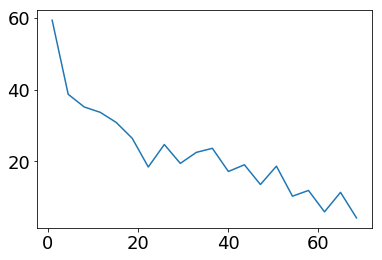

In [32]:
plt.plot(x, ratio);